# Heat Exchanger

## 1. Design without fins
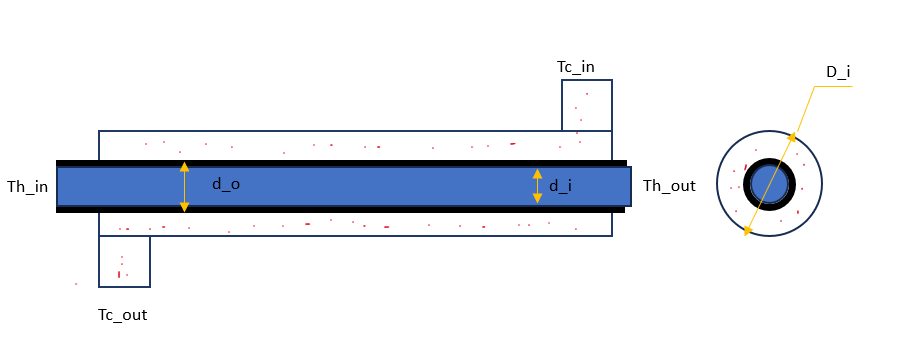

Inner fluid is presented in blue.

Outer fluid is presented as red dots.

In [1]:
import numpy as np
from scipy.optimize import fsolve
import scipy.special as sp

In [2]:
#General Information
Th_in = 350
Th_out = 288.571

Tc_in = 184
Tc_out = 242

Q = 7910.64*10**3 # W (From DWSIM using Coolprop)

### Inner Pipe

In [3]:
#Inner pipe dimensions


v_theo = 25 #m/s (Recommended velocity from piping book)
vol_I= (1.8735+1.666)/2 #m3/s using Coolprop (Average volumetric flowrate)

a_theo = vol_I / v_theo #theoretical area
d_theo = np.sqrt(4*a_theo/np.pi) #theoretical diameter
print('The theoretical inner diameter is {} m.'.format(d_theo))
print()
print('Choose 14 inch nom, schedule 60 with an inside diameter is 325.4756 mm. ')


The theoretical inner diameter is 0.30022096424434147 m.

Choose 14 inch nom, schedule 60 with an inside diameter is 325.4756 mm. 


In [4]:
#Inner pipe flow (Hot fluid)

d_i = 325.4756*10**-3 #m

v_I= vol_I / (np.pi*(d_i)**2/4)

t=15.0622*10**-3 #m (thickness of pipe)

d_o = d_i+2*t #Outer diameter of inside pipe
print('Velocity through the inside pipe is {} m/s'.format(v_I))


print()
print('The outside diameter of the inside pipe is {} mm'.format(d_o*1000))

Velocity through the inside pipe is 21.27086577494199 m/s

The outside diameter of the inside pipe is 355.59999999999997 mm


In [5]:
#Inner pipe properties

e = 0.046/1000   #Absolute roughness of steel in meters
Rho_I = (22.984+20.438)/2 #Kg/m3
Cp_I = (3.37+3.35)/2*10**3 #J/KgK
K_I = (0.084581+0.09139)/2 #W/mK
mu_I = (1.83+1.9753)/2*10**-5 #Pa.s

Re_I = Rho_I*v_I*d_i/mu_I

print('Reynolds number for inner pipe flow is {}'.format(Re_I))
print()

Pr_I = mu_I*Cp_I/K_I

print('Prandtl number for inner pipe fluid is {}'.format(Pr_I))
print()

def friction(x):
    LHS=1/np.sqrt(x)
    RHS=-2*np.log10(e/d_i/3.7+2.51/Re_I/np.sqrt(x))
    return LHS-RHS

f_I = fsolve(friction,0.02)      #friction factor inside tube

print('The friction factor of the inner pipe is {} .'.format(float(f_I)))
print()

Nu_I = (f_I/8)*Re_I*Pr_I/(1.07+12.7*(f_I/8)**0.5*(Pr_I**(2/3)-1)) #Second Petukhov
print('Inner pipe Nusselt number is {}'.format(float(Nu_I)))
print()

h_I = K_I*Nu_I/d_i
print('The inner convective heat transfer coefficient is {} W/m2K'.format(float(h_I)))
     
      


 


Reynolds number for inner pipe flow is 7899953.322956547

Prandtl number for inner pipe fluid is 0.7265860852072219

The friction factor of the inner pipe is 0.012987689845442732 .

Inner pipe Nusselt number is 9588.48663396873

The inner convective heat transfer coefficient is 2592.046195576737 W/m2K


### Outer Pipe

In [6]:
#Outer pipe dimensions

vol_O = (1.65311+1.87441)/2 #m3/s (Volumetric flowrate of outer pipe)


print("Choose 20 inch nom, schedule 60 with an inside diameter of 466.7504 mm")
print()

D_i = 466.7504*10**-3 #m (Inner diameter of outer pipe)

A = np.pi*(D_i**2 - d_o**2)/4  #m2 (Area of annulus)
print('The area of the annulus is {} m2'.format(A))


Choose 20 inch nom, schedule 60 with an inside diameter of 466.7504 mm

The area of the annulus is 0.07178898603810834 m2


In [7]:
#Outer pipe flow
v_O = vol_O / A
print('The velocity through the outer pipe is {} m/s'.format(v_O))


The velocity through the outer pipe is 24.568671287037386 m/s


In [8]:
#Outer pipe propperties

Rho_O = (20.4285+23.1633)/2 #Kg/m3
Cp_O = (3.49+3.52)/2*10**3  #J/KgK
K_O =  (0.08488+0.07851)/2 #W/mK
mu_O = ((1.6705+1.543)/2)*10**-5 #Pa.s


D_h = D_i - d_o #Hydraulic diameter


Re_O = Rho_O*v_O*(D_h)/mu_O 

print('Reynolds number for outer pipe flow is {}'.format(Re_O))
print()

Pr_O = mu_O*Cp_O/K_O

print('Prandtl number for outer pipe fluid is {}'.format(Pr_O))
print()

f_O = (0.79*np.log(Re_O)-1.64)**-2 #Assume flow to be smooth (Recommended formula from textbook)


print('The friction factor of the outer pipe is {} .'.format(float(f_O)))
print()

Nu_O = (f_O/8)*(Re_O-1000)*Pr_O/(1+12.7*(f_O/8)**0.5*(Pr_O**(2/3)-1)) #Gnielinski
print('Outer pipe Nusselt number is {}'.format(float(Nu_O)))
print()

h_O = K_O*Nu_O/D_h
print('The outer convective heat transfer coefficient is {} W/m2K'.format(float(h_O)))

Reynolds number for outer pipe flow is 3704411.2787905475

Prandtl number for outer pipe fluid is 0.6893517045106802

The friction factor of the outer pipe is 0.009409914155319278 .

Outer pipe Nusselt number is 3320.554367434547

The outer convective heat transfer coefficient is 2440.591208376805 W/m2K


### Overall heat transfer and lenght

In [9]:
#Overall heat transfer coefficient

Ri = 8.815*10**-5
Ro = 8.815*10**-5
K_steel = 51.9 #W/mK
# Caclulation of tube lenghts
#Log mean temperature difference

delT1 = Th_in-Tc_out
delT2 = Th_out -Tc_in
delT_lm = (delT1 - delT2)/np.log(delT1/delT2)
print('The log mean temperature difference is {} degrees Celcius.'.format(delT_lm))
print()

U = 1/( 1/h_I*d_o/d_i + 1/h_O +Ri*d_o/d_i +Ro + d_o*np.log(d_o/d_i)/(2*K_steel)) #Overall heat transfer coefficient
print('The overall heat transfer coefficient based on the outside area of the tube  is {} W/m2K'.format(float(U)))
print()

A_heat_transfer = Q/U/delT_lm
print('The heat transfer area needed is {} m2'.format(A_heat_transfer))
print()

L = A_heat_transfer/np.pi/d_o
print('Recommended lenght without fins is {} m'.format(L))



The log mean temperature difference is 106.27628044747472 degrees Celcius.

The overall heat transfer coefficient based on the outside area of the tube  is 758.1797127484002 W/m2K

The heat transfer area needed is [98.17549854] m2

Recommended lenght without fins is [87.8802918] m


In [10]:
#Check: This cell confirms the lenght calculated above
R = delT_lm/Q #Total resistance 
num = 1/(h_I*np.pi*d_i) + 1/(h_O*np.pi*d_o) + np.log(d_o/d_i)/(2*np.pi*K_steel) + Ri/(np.pi*d_i) +Ro/(np.pi*d_o)
L_without_fins = num/R
print('Length without fins = {} m'.format(L_without_fins))

Length without fins = [87.8802918] m


## 2. Design with fins
 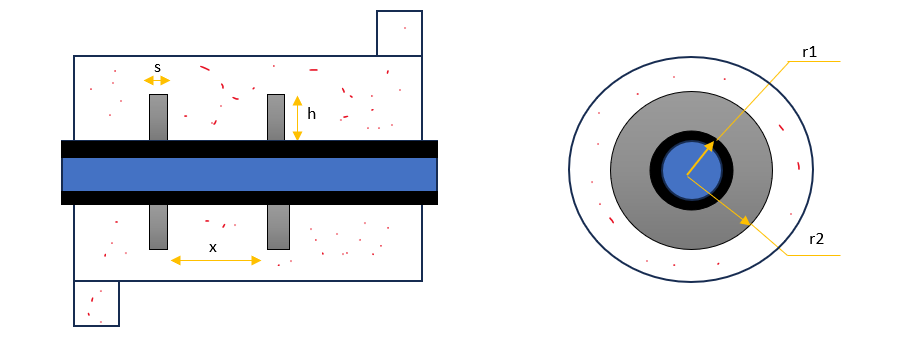
 
 For the following code, the lenght of the double pipe heat exhanger must first be guessed. Then the corresponding duty will be determined based on the fin lenght and number of fins. The lenght must be chosen such that the duty calculated must equal the Q value spesified at the top of this notebook.



In [11]:
L_guess=24 #m

In [12]:
#General Parameters

s = 4*10**-3 #m
x = 50*10**-3 #m
r1 = d_o/2 #m
h = 10*10**-3 #m
r2 = r1+h
N_max = L_guess/(s+x) #Maximum number of fins
N = int(N_max)


print('The chosen lenght is  {} m'.format(L_guess))
print()
print('s = {} mm'.format(s*10**3))
print()
print('x = {} mm'.format(x*10**3))
print()
print('r1 = {} mm'.format(r1*10**3))
print()
print('h = {} mm'.format(h*10**3))
print()
print('r2 = {} mm'.format(r2*10**3))
print()
print('The maximum number of fins is {}'.format(N_max))
print()
print('The chosen number of fins is {} '.format(N))
print()

The chosen lenght is  24 m

s = 4.0 mm

x = 50.0 mm

r1 = 177.79999999999998 mm

h = 10.0 mm

r2 = 187.79999999999998 mm

The maximum number of fins is 444.4444444444444

The chosen number of fins is 444 



It must be noted that due to the pressence of fins, the annulus area will decrease and increase the outer pipe flow. This will have an effect on Reynold and Nusselts number. As a result the outer heat transfer coeficient will also be affected.

In [13]:
#New properties of outer pipe fluid

D_h_new = D_i - 2*r2

print('The new hydraulic diameter is {} mm '.format(D_h_new*1000))
print()

Clr = D_i/2 - r2

print('The clearance is {} mm'.format(Clr*1000))
print()

Anulus_area_new = np.pi*( D_i**2 - (2*r2)**2 )/4

print('The new area of the annulus is {} m2'.format(Anulus_area_new))
print()

v_O_new = vol_O/Anulus_area_new

print('The new outer velocity is {} m/s'.format(v_O_new))
print()

Re_O_new = Rho_O*v_O_new*(D_h_new)/mu_O 

print('New Reynolds number is {}'.format(Re_O_new))
print()

f_O_new = (0.79*np.log(Re_O_new)-1.64)**-2 #Assume flow to be smooth


print('The new friction factor of the outer pipe is {} .'.format(float(f_O_new)))
print()

Nu_O_new = (f_O_new/8)*(Re_O_new-1000)*Pr_O/( 1 + 12.7*(f_O_new/8)**0.5* (Pr_O**(2/3)-1) ) #Gnielinski
print('New outer pipe Nusselt number is {}'.format(float(Nu_O_new)))
print()


h_O_new = K_O*Nu_O_new/D_h_new
print('The new outer convective heat transfer coefficient is {} W/m2K'.format(float(h_O_new)))

The new hydraulic diameter is 91.15040000000002 mm 

The clearance is 45.57520000000001 mm

The new area of the annulus is 0.06030332329658406 m2

The new outer velocity is 29.24813929947887 m/s

New Reynolds number is 3616457.1143765314

The new friction factor of the outer pipe is 0.009444666265426236 .

New outer pipe Nusselt number is 3254.300010304616

The new outer convective heat transfer coefficient is 2916.718295716042 W/m2K


It was expected for the outer Reynolds number to increase, but it did not. The reason for this is the decrease in hydraulic diameter. The result is a decrease in outer heat transfer coefficient.

In [14]:
#Some parameters needed

m = np.sqrt((2*h_O_new)/(K_steel*s))
print('m = {}'.format(m))
print()

r2c = r2 +s/2
print('r2c = {} m'.format(r2c))
print()

A_fin = 2*np.pi*(r2c**2 - r1**2)
print('A_fin (for one fin) = {} m2'.format(A_fin))
print()

C2 = 2*r1/m/(r2c**2 - r1**2)

efficiency = C2*( sp.kv(1, m*r1)*sp.iv(1,m*r2c) - sp.iv(1,m*r1)*sp.kv(1,m*r2c) )/( sp.iv(0,m*r1)*sp.kv(1,m*r2c) + sp.kv(0,m*r1)*sp.iv(1,m*r2c) )
print('Fin efficiency = {} %'.format(efficiency*100))
print()

A_b = 2*np.pi*r1*s

Effectiveness = A_fin/A_b*efficiency
print('The effectiveness is {}'.format(Effectiveness))




m = 167.62877302658194

r2c = 0.1898 m

A_fin (for one fin) = 0.027716387027030616 m2

Fin efficiency = 47.14556167396682 %

The effectiveness is 2.9241915305990247


In [15]:
#Heat transfer from fined base area, but with no fins

Q_no_fin = h_O_new*A_b*delT_lm*N
print('Q_no_fin = {} W'.format(Q_no_fin))

Q_no_fin = 615014.589701986 W


In [16]:
#Heat transfer due to only fins
Q_fins = Effectiveness*Q_no_fin
print('Q_fins = {} W'.format(Q_fins))

Q_fins = 1798420.4544013818 W


In [17]:
#Heat transfer due to the unfinned area
A_total = np.pi*d_o*L_guess

Q_unfinned = h_O*(A_total-A_b*N)*delT_lm
print('Q_unfinned = {} W'.format(Q_unfinned))

Q_unfinned = 6439694.161995633 W


In [18]:
#Total heat transfer
Q_tot = Q_fins + Q_unfinned
print('Q_total = {} MW'.format(float(Q_tot/10**6)))
print()
print('But target Q = {} MW'.format(Q/10**6))
print()
print('Error = {} MW'.format((Q_tot-Q)/10**6))

Q_total = 8.238114616397015 MW

But target Q = 7.91064 MW

Error = 0.32747461639701386 MW


In [19]:
print('The length of the double pipe heat exchanger with fins is {} m'.format(L_guess))

The length of the double pipe heat exchanger with fins is 24 m
